# Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on a sample of data. It involves testing an assumption (hypothesis) about a population parameter.

---

## Null Hypothesis ($H_0$)

- **Definition:**
  - The null hypothesis is a statement that there is no effect or no difference in the population.
  - It represents the status quo or a baseline assumption that is tested for possible rejection.

  Important thing is , **no effect** in the population !!!

- **Example:**
  - ($H_0: \mu = \mu_0$) (The population mean is equal to a specified value) ($\mu_0$).

---

## Alternative Hypothesis ($H_a$) or ($H_1$)

- **Definition:**
  - The alternative hypothesis is a statement that there is an effect or a difference in the population.
  - It represents the hypothesis that the researcher aims to support.

Important thing is , **effect** in the population !!!

- **Example:**
  - ($H_a: \mu \neq \mu_0$) (The population mean is not equal to a specified value) ($\mu_0$).

---

## T-Test

The T-test is a statistical test used to compare the means of two groups. It helps determine whether there is a significant difference between the means.

- the important thing is determine significant difference !!

**Paired T-Test:**
   - Compares the means of two **related groups** (e.g., measurements before and after treatment).
   - **Formula:**
     $$
     t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}
     $$
     - ($\bar{d}$): Mean of the differences between paired observations.
     - ($s_d$): Standard deviation of the differences.
     - ($n$): Number of pairs.

**Two-Sample Independent T-Test:**
   - Compares the means of two **independent groups.**
   - **Formula:**
     $$
     t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
     $$
     - ($\bar{X}_1, \bar{X}_2$): Sample means of the two groups.
     - ($s_1^2, s_2^2$): Sample variances of the two groups.
     - ($n_1, n_2$): Sample sizes of the two groups.

---

## P-Value

- **Definition:**
  - The p-value is the probability of obtaining a test statistic at least as extreme as the one observed, assuming the null hypothesis is true.
  - It quantifies the evidence against the null hypothesis.

- **Interpretation:**
  - A small p-value $\leq \alpha$ indicates strong evidence against the null hypothesis, leading to its rejection.(in rejection, $H_0$ reject, $H_1$ adopt)
  - A large p-value $>\alpha$ suggests insufficient evidence to reject the null hypothesis.(not in rejection, can't reject $H_1$)

- **Significance Level $\alpha$:**
  - Common choices for $\alpha$ are 0.05.

In [3]:
# paired T-test
before = [130, 133, 132, 138, 140, 128, 140, 132, 126, 130, 125, 140]
after = [120, 130, 121, 107, 132, 125, 141, 133, 118, 133, 111, 131]

In [4]:
import pandas as pd
dat = pd.DataFrame({'before' : before, 'after' : after})

In [5]:
dat.mean()

before    132.833333
after     125.166667
dtype: float64

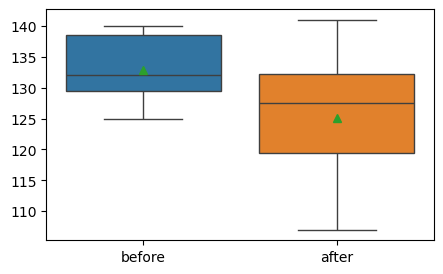

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,3)

sns.boxplot(data=dat, showmeans=True)
plt.show()

# in the boxplot, we can see quite different mean between before and after.
# now test this.(significantly difference?)

In [9]:
# paired T-test
from scipy import stats

result = stats.ttest_rel(dat.before, dat.after) # Two-tailed test(default value)
result

TtestResult(statistic=2.9188637754073192, pvalue=0.013965838615562465, df=11)

result: p-value(=0.014) < $\alpha$ (0.05). so $H_0$ Reject. <br>
->mean of before and after is **(statistically significant)** different !!

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# two-sample independence T-test

In [13]:
# [step 1] bartlett test
dat_M = tips.loc[tips.sex == 'Male', ['tip', 'sex']]
dat_F = tips.loc[tips.sex == 'Female', ['tip', 'sex']]
dat_M
s, p = stats.bartlett(dat_M.tip, dat_F.tip)
print('p-value : %.4f' % p)

# actually, bartlett test is not used in two dataset. But in Python, there's no alternative option.

p-value : 0.0106


In [16]:
# [step 2] T-test
print(dat_F)
result = stats.ttest_ind(dat_M.tip, dat_F.tip, equal_var=False)
print("t-test test statistic, p-value %.3f and %.3f." % result)

      tip     sex
0    1.01  Female
4    3.61  Female
11   5.00  Female
14   3.02  Female
16   1.67  Female
..    ...     ...
226  2.00  Female
229  2.88  Female
238  4.67  Female
240  2.00  Female
243  3.00  Female

[87 rows x 2 columns]
t-test test statistic, p-value 1.490 and 0.138.


- p-value(0.138) > $\alpha$(0.05) so can't reject $H_0$ <br>
- mean of tips depending on sex is **(statistically significant)** not different !!

---

# Analysis of Variance(ANOVA)

### : Tests whether there is a difference between the means of three or more independent groups
- Hypothesis : $H_{0} : \mu_{1} = \cdots = \mu_{k}$ vs. $H_{1}$ : not $H_{0}$
- Prerequisites : all group are independent each other, normal distribution, certain variance

### Test Statistics using variance
$$ F = \frac{\hat{\sigma}^{2}_{between}}{\hat{\sigma}^{2}_{within}} $$

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (5,3)

tips = sns.load_dataset('tips')

In [18]:
tips.groupby('day', observed=False).tip.mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [19]:
thur = tips.tip[tips.day == 'Thur']
fri = tips.tip[tips.day == 'Fri']
sat = tips.tip[tips.day == 'Sat']
sun = tips.tip[tips.day == 'Sun']
from scipy import stats
result = stats.f_oneway(thur, fri, sat, sun)                 

print('F statistic : %.3f \np-value : %.4f' % (result))

thur

F statistic : 1.672 
p-value : 0.1736


77     4.00
78     3.00
79     2.71
80     3.00
81     3.40
       ... 
202    2.00
203    2.50
204    4.00
205    3.23
243    3.00
Name: tip, Length: 62, dtype: float64

- p-value(0.1736) > $\alpha$(0.05), so can't reject $H_0$ <br>
- mean of tips depending on days **(statistically significant)** not different !!

In [21]:
# using statsmodel library ! 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('tip ~ day', tips).fit()
print(anova_lm(model))

             df      sum_sq   mean_sq         F    PR(>F)
day         3.0    9.525873  3.175291  1.672355  0.173589
Residual  240.0  455.686604  1.898694       NaN       NaN
